Objective: Implement a model predictive controller that automatically regulates vehicle velocity. Implement the controller in Python and tune the controller for acceptable performance. Discuss factors that may be important for evaluating controller performance.

The dynamic relationship between a vehicle gas pedal position (MV) and velocity (CV) is given by the following set of conditions and a single dynamic equation.

Implement a model predictive controller that adjusts gas pedal position to regulate velocity. Start at an initial vehicle velocity of 0 m/s and accelerate to a velocity of 40 m/s.

Discuss the controller performance and how it could be tuned to meet multiple objectives including:

minimize travel time
remain within speed limits
improve vehicle fuel efficiency
discourage excessive gas pedal adjustments
do not accelerate excessively
There is no need to implement these advanced objectives in simulation for this second part of the exercise, only discuss the possible competing objectives.

### Solution

The Model Predictive Control both solves the differential equations that describe the velocity of a vehicle as well as minimizes the control objective function.

The multiple objectives can be implemented with variable constraints or alternative objective functions. For example, if the only objective is to minimize travel time, the solution would be to use full gas pedal position (100%) for the duration of the simulation. If the objective is to minimize travel time but stay within the speed limit, the solution would be to reach 40 m/s as fast as possible without overshoot. Each additional objective has the potential to adapt the solution to achieve an optimal tradeoff. It is a tradeoff because some of the desirable outcomes have conflicting objectives.

apm 78.23.238.168_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            360
 Number of total equations: -          320
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             40
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

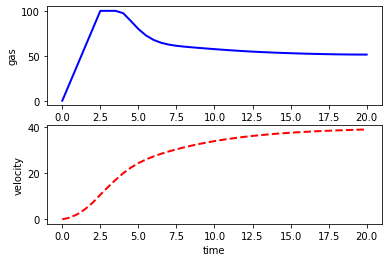

In [1]:
#%%Import packages
import numpy as np
from random import random
from gekko import GEKKO
import matplotlib.pyplot as plt

#%% Build model

#initialize GEKKO model
m = GEKKO()

#time
m.time = np.linspace(0,20,41)

#constants
mass = 500

#Parameters
b = m.Param(value=50)
K = m.Param(value=0.8)
#Manipulated variable
p = m.MV(value=0, lb=0, ub=100)

#Controlled Variable
v = m.CV(value=0)

#Equations
m.Equation(mass*v.dt() == -v*b + K*b*p)

#%% Tuning

#global
m.options.IMODE = 6 #control

#MV tuning
p.STATUS = 1 #allow optimizer to change
p.DCOST = 0.1 #smooth out gas pedal movement
p.DMAX = 20 #slow down change of gas pedal

#CV tuning
#setpoint
v.STATUS = 1 #add the SP to the objective
m.options.CV_TYPE = 2 #L2 norm
v.SP = 40 #set point
v.TR_INIT = 1 #setpoint trajectory
v.TAU = 5 #time constant of setpoint trajectory

#%% Solve

m.solve()

#%% Plot solution
plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,p.value,'b-',LineWidth=2)
plt.ylabel('gas')
plt.subplot(2,1,2)
plt.plot(m.time,v.value,'r--',LineWidth=2)
plt.ylabel('velocity')
plt.xlabel('time')
plt.show()